# Garrett Evans | James Gaboardi
## Smart Cites
## Fall 2016

----


## Exercise 1



# *Supplementing the U.S. Census with Social Media:*
# *Integrating the ACS and Twitter*

--------------

### Socioeconomic Variables
- Median Household Income
- Total Population
- Age (20 - 39)
- Education Attainment (Bachelor's degree)
- Travel Time to Work (less than 25)

### Hypothesis for Travel Time to Work
- We expect the number of tweets in the Tampa-St.Petersburg-Clearwater MSA will be positively correlated with shorter commute times (less than 25 minutes). We hypothesize that if an individual spends less time communting, they will be able to send more tweets.

### Data Collection

- American Community Survey (ACS) data from the National Historical Geographic Information System (NHGIS).  This includes variable data and spatial data.
    - https://www.census.gov/programs-surveys/acs/
    - https://www.nhgis.org
- Metropolitan Statistical Area (MSA) data from U.S. Census Bureau.
    - http://www.census.gov/
- Twitter data from Followthehashtag.com.
    - http://www.followthehashtag.com

### Data Prep, Calculations, & Visualizations

- QGIS
    - fTools $ \Rightarrow $ Carson Farmer
- GeoPandas
- NumPy

### Imports

In [43]:
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import multiprocessing as mp
import numpy as np
import pandas as pd
import pysal as ps
from shapely.geometry import Point
import time
import xlrd

%matplotlib inline

mpl.rcParams['figure.figsize'] = 25,25      #set the default map size
mpl.rcParams['patch.linewidth'] = 0.5       #set default polygon line width
mpl.rcParams['markers.fillstyle'] = 'full'  #set default polygon line width

### Matrix Function

In [2]:
def correlation_matrix(df,title):
    
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 100)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title(title)
    labels=["",'Tweets','Twts/1000','Inc.','Age','Ed.','Commute',]
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    cbar = fig.colorbar(cax, ticks=[])
    plt.show()

#http://datascience.stackexchange.com/questions/10459/calculation-and-visualization-of-correlation-matrix-with-pandas

### Directories & Paths

In [3]:
data_directory = "/Users/jgaboardi/Dropbox/Fall_16/Smart_Cities/Exercises/Exercise_1/data/"
# MSA List
msa_list = "List1.xls"
# County Data
county_shapes = "US_county_2014.shp"
county_demographic = "nhgis0010_ds206_20145_2014_county.csv"
prepped_county = "US_Continental_Reproj_PNTCNT_joined.shp"
# Census Tract Data
tract_shapes = "US_tract_2014.shp"
tract_demographic = "nhgis0010_ds206_20145_2014_tract.csv"
# Twitter Data (Clean for Tampa MSA)
tweets = "tampa_msa_tweets_REPROJECTED.shp"
results_directory = "/Users/jgaboardi/Dropbox/Fall_16/Smart_Cities/Exercises/Exercise_1/results/"

### Coordinate Refernce Systems

In [4]:
# Initial
wgs = {'init': 'epsg:4326', 'no_defs': True}

# NAD83 / Florida West (ftUS) --> {'init': 'epsg:2237', 'no_defs': True}
florida_west = 2237

## Study Area
### Metropolitan Statistical Areas

In [5]:
t1 = time.time()
all_msa = pd.read_excel(data_directory+msa_list,
                        header=2,
                        usecols=['CBSA Code', 'CBSA Title',
                                   'Metropolitan/Micropolitan Statistical Area',
                                   'County/County Equivalent', 'State Name', 'FIPS State Code',
                                   'FIPS County Code', 'Central/Outlying County'])
print round((time.time()-t1)/60, 8),\
      "minutes to run."

0.00160372 minutes to run.


### Tampa-St. Petersburg-Clearwater, FL

In [6]:
tampa_msa_df = all_msa[all_msa["CBSA Title"] == "Tampa-St. Petersburg-Clearwater, FL"]
tampa_msa_code = tampa_msa_df["CBSA Code"].values[0]
print round((time.time()-t1)/60, 8),\
      "minutes to run."

0.01172055 minutes to run.


### Tampa MSA Counties from US Counties `.shp`

In [7]:
t1 = time.time()
us_counties = gpd.read_file(data_directory+county_shapes,
                            crs=wgs)
florida_counties = us_counties[us_counties["STATEFP"] == "12"]   
tampa_msa_counties = florida_counties[florida_counties["CBSAFP"] == tampa_msa_code]    
tampa_msa_counties = tampa_msa_counties.to_crs(epsg=florida_west)
print round((time.time()-t1)/60, 8),\
      "minutes to run."    

0.61913387 minutes to run.


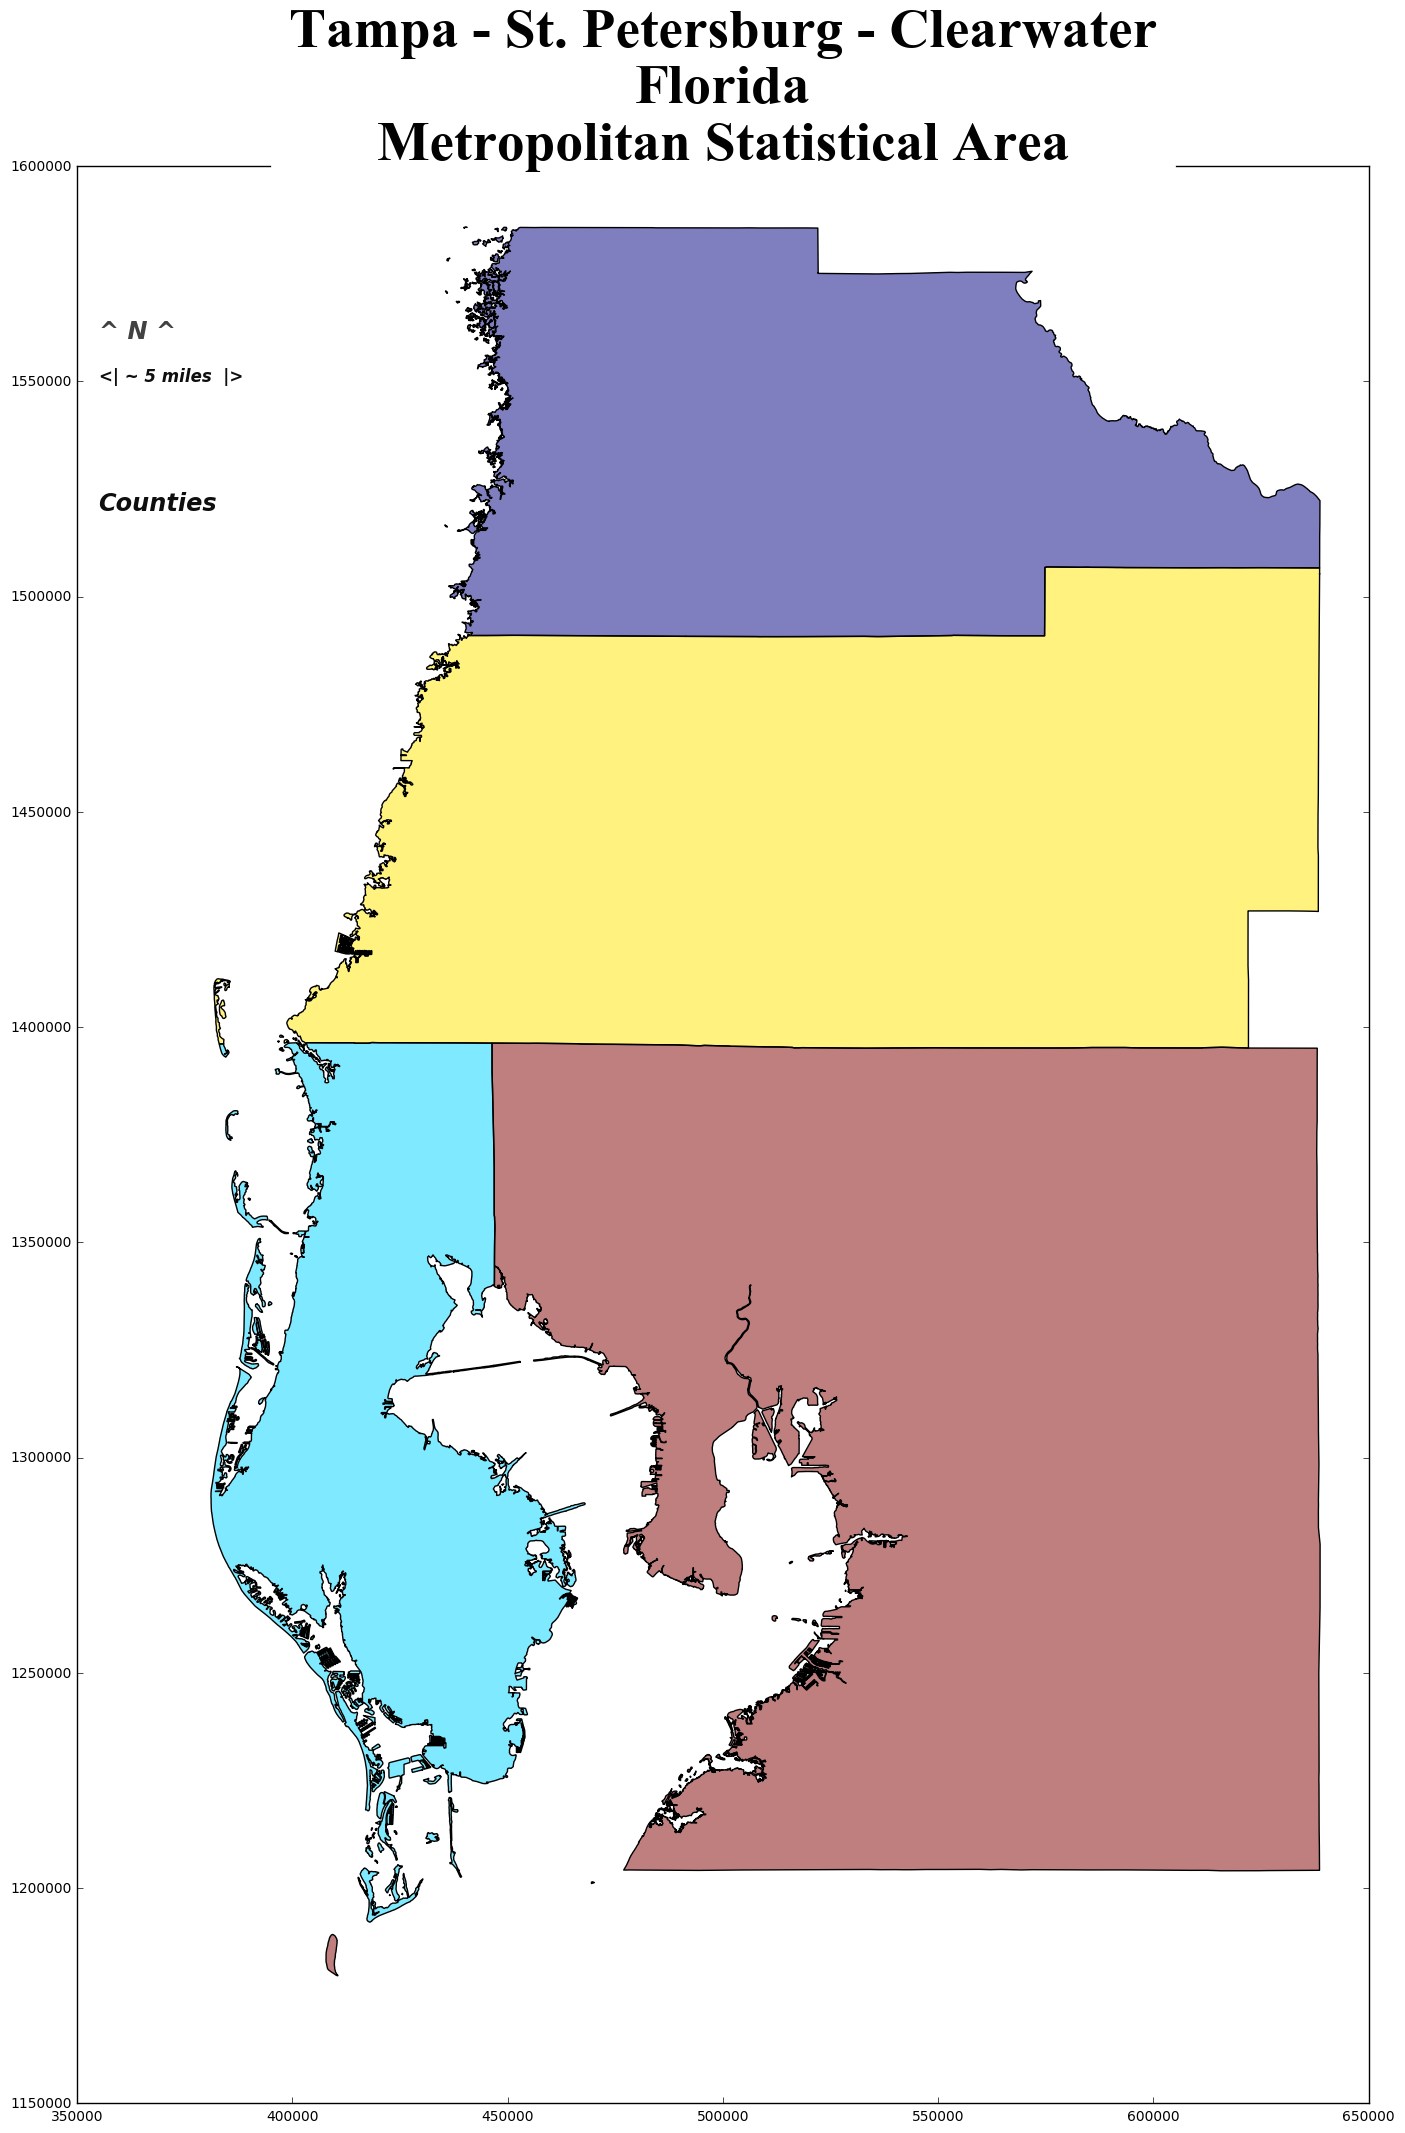

In [44]:
tampa_msa_counties.plot()

# Title
plt.title('Tampa - St. Petersburg - Clearwater\nFlorida\nMetropolitan Statistical Area', 
          family='Times New Roman', 
          size=40, 
          color='k', 
          backgroundcolor='w', 
          weight='bold')

# Must be changed for different spatial resolutions, etc.
plt.annotate('^ N ^',
             xy=(355000, 1560000), 
             fontstyle='italic', 
             fontsize='xx-large',
             fontweight='heavy', 
             alpha=0.75)
plt.annotate('<| ~ 5 miles  |>', 
             xy=(355000, 1550000), 
             fontstyle='italic',
             fontweight='heavy',
             fontsize='large', 
             alpha=0.95)
plt.annotate("Counties", 
             xy=(355000, 1520000), 
             fontstyle='italic',
             fontweight='heavy',
             fontsize='xx-large', 
             alpha=0.95)
plt.show()

### Twitter Data

In [9]:
#twitter_data = pd.read_csv(tweets)
#geometry = [Point(xy) for xy in zip(twitter_data.Longitude, twitter_data.Latitude)]
#twitter_data = gpd.GeoDataFrame(twitter_data,
#                                crs=wgs,
#                                geometry=geometry)
#twitter_data_reprojected = twitter_data.to_crs(epsg=florida_west)

### Tampa MSA Tweets

In [10]:
#tampa_tweets = [Tampa_MSA_union['geometry'].intersection(tweet) for tweet in tampa['geometry']]
#tampa_tweets = gpd.GeoDataFrame(tampa_tweets, crs=Tampa_MSA_union.crs)
#tampa_tweets.columns = ['geometry']
#tampa_tweets[:5]

### US County Demographic Data

In [11]:
us_county_data = pd.read_csv(data_directory+county_demographic)

### Join Tampa MSA and US County Data

In [12]:
tampa_msa_counties_Data = tampa_msa_counties.merge(us_county_data, on="GISJOIN")

### Counties Calculate Stats

In [13]:
# Age Ratio (20-39)
tampa_msa_counties_Data["Age_Ratio"] = ((tampa_msa_counties_Data["ABAQE008"]    #Males
                                         + tampa_msa_counties_Data["ABAQE009"]
                                         + tampa_msa_counties_Data["ABAQE010"]
                                         + tampa_msa_counties_Data["ABAQE011"]
                                         + tampa_msa_counties_Data["ABAQE012"]
                                         + tampa_msa_counties_Data["ABAQE013"]
                                         + tampa_msa_counties_Data["ABAQE032"]  #Females
                                         + tampa_msa_counties_Data["ABAQE033"]
                                         + tampa_msa_counties_Data["ABAQE034"]
                                         + tampa_msa_counties_Data["ABAQE035"]
                                         + tampa_msa_counties_Data["ABAQE036"]
                                         + tampa_msa_counties_Data["ABAQE037"])
                                         / tampa_msa_counties_Data["ABAQE001"])

In [14]:
# Education Ratio (Bachelor's Degree)
tampa_msa_counties_Data["Ed_Ratio"] = (tampa_msa_counties_Data["ABC4E022"]
                                       /tampa_msa_counties_Data["ABC4E001"])

In [15]:
# Commute Time (Less than 25 minutes)
tampa_msa_counties_Data["Commute"] = ((tampa_msa_counties_Data["ABBTE002"]
                                       + tampa_msa_counties_Data["ABBTE003"]
                                       + tampa_msa_counties_Data["ABBTE004"]
                                       + tampa_msa_counties_Data["ABBTE005"]
                                       + tampa_msa_counties_Data["ABBTE006"])
                                       / tampa_msa_counties_Data["ABBTE001"])

### Quick Look at the Data

In [16]:
tampa_msa_counties_Data = tampa_msa_counties_Data.rename(columns = {"ABDPE001":"Median_HH_Income"})
tampa_msa_counties_Data[["Age_Ratio","Ed_Ratio","Commute","Median_HH_Income"]]

Age_Ratio  Ed_Ratio   Commute  Median_HH_Income
0   0.190636  0.108454  0.540506             40457
1   0.217804  0.185851  0.615922             45574
2   0.216195  0.142691  0.459580             44518
3   0.285615  0.192249  0.527370             50122

------------------------


### Tampa MSA Tracts from US Tracts `.shp`

In [17]:
t1 = time.time()
us_tracts = gpd.read_file(data_directory+tract_shapes,
                          crs=wgs)
us_tracts = us_tracts.to_crs(epsg=florida_west)
florida_tracts = us_tracts[us_tracts["STATEFP"] == "12"]

hernando_tracts = florida_tracts[florida_tracts["COUNTYFP"] == "053"]
hillsborough_tracts = florida_tracts[florida_tracts["COUNTYFP"] == "057"]
pasco_tracts = florida_tracts[florida_tracts["COUNTYFP"] == "101"]
pinnellas_tracts = florida_tracts[florida_tracts["COUNTYFP"] == "103"]

tampa_mas_tracts = gpd.GeoDataFrame()
tampa_mas_tracts = tampa_mas_tracts.append(hernando_tracts)
tampa_mas_tracts = tampa_mas_tracts.append(hillsborough_tracts)
tampa_mas_tracts = tampa_mas_tracts.append(pasco_tracts)
tampa_mas_tracts = tampa_mas_tracts.append(pinnellas_tracts)
print round((time.time()-t1)/60, 8),\
      "minutes to run."

6.00184216 minutes to run.


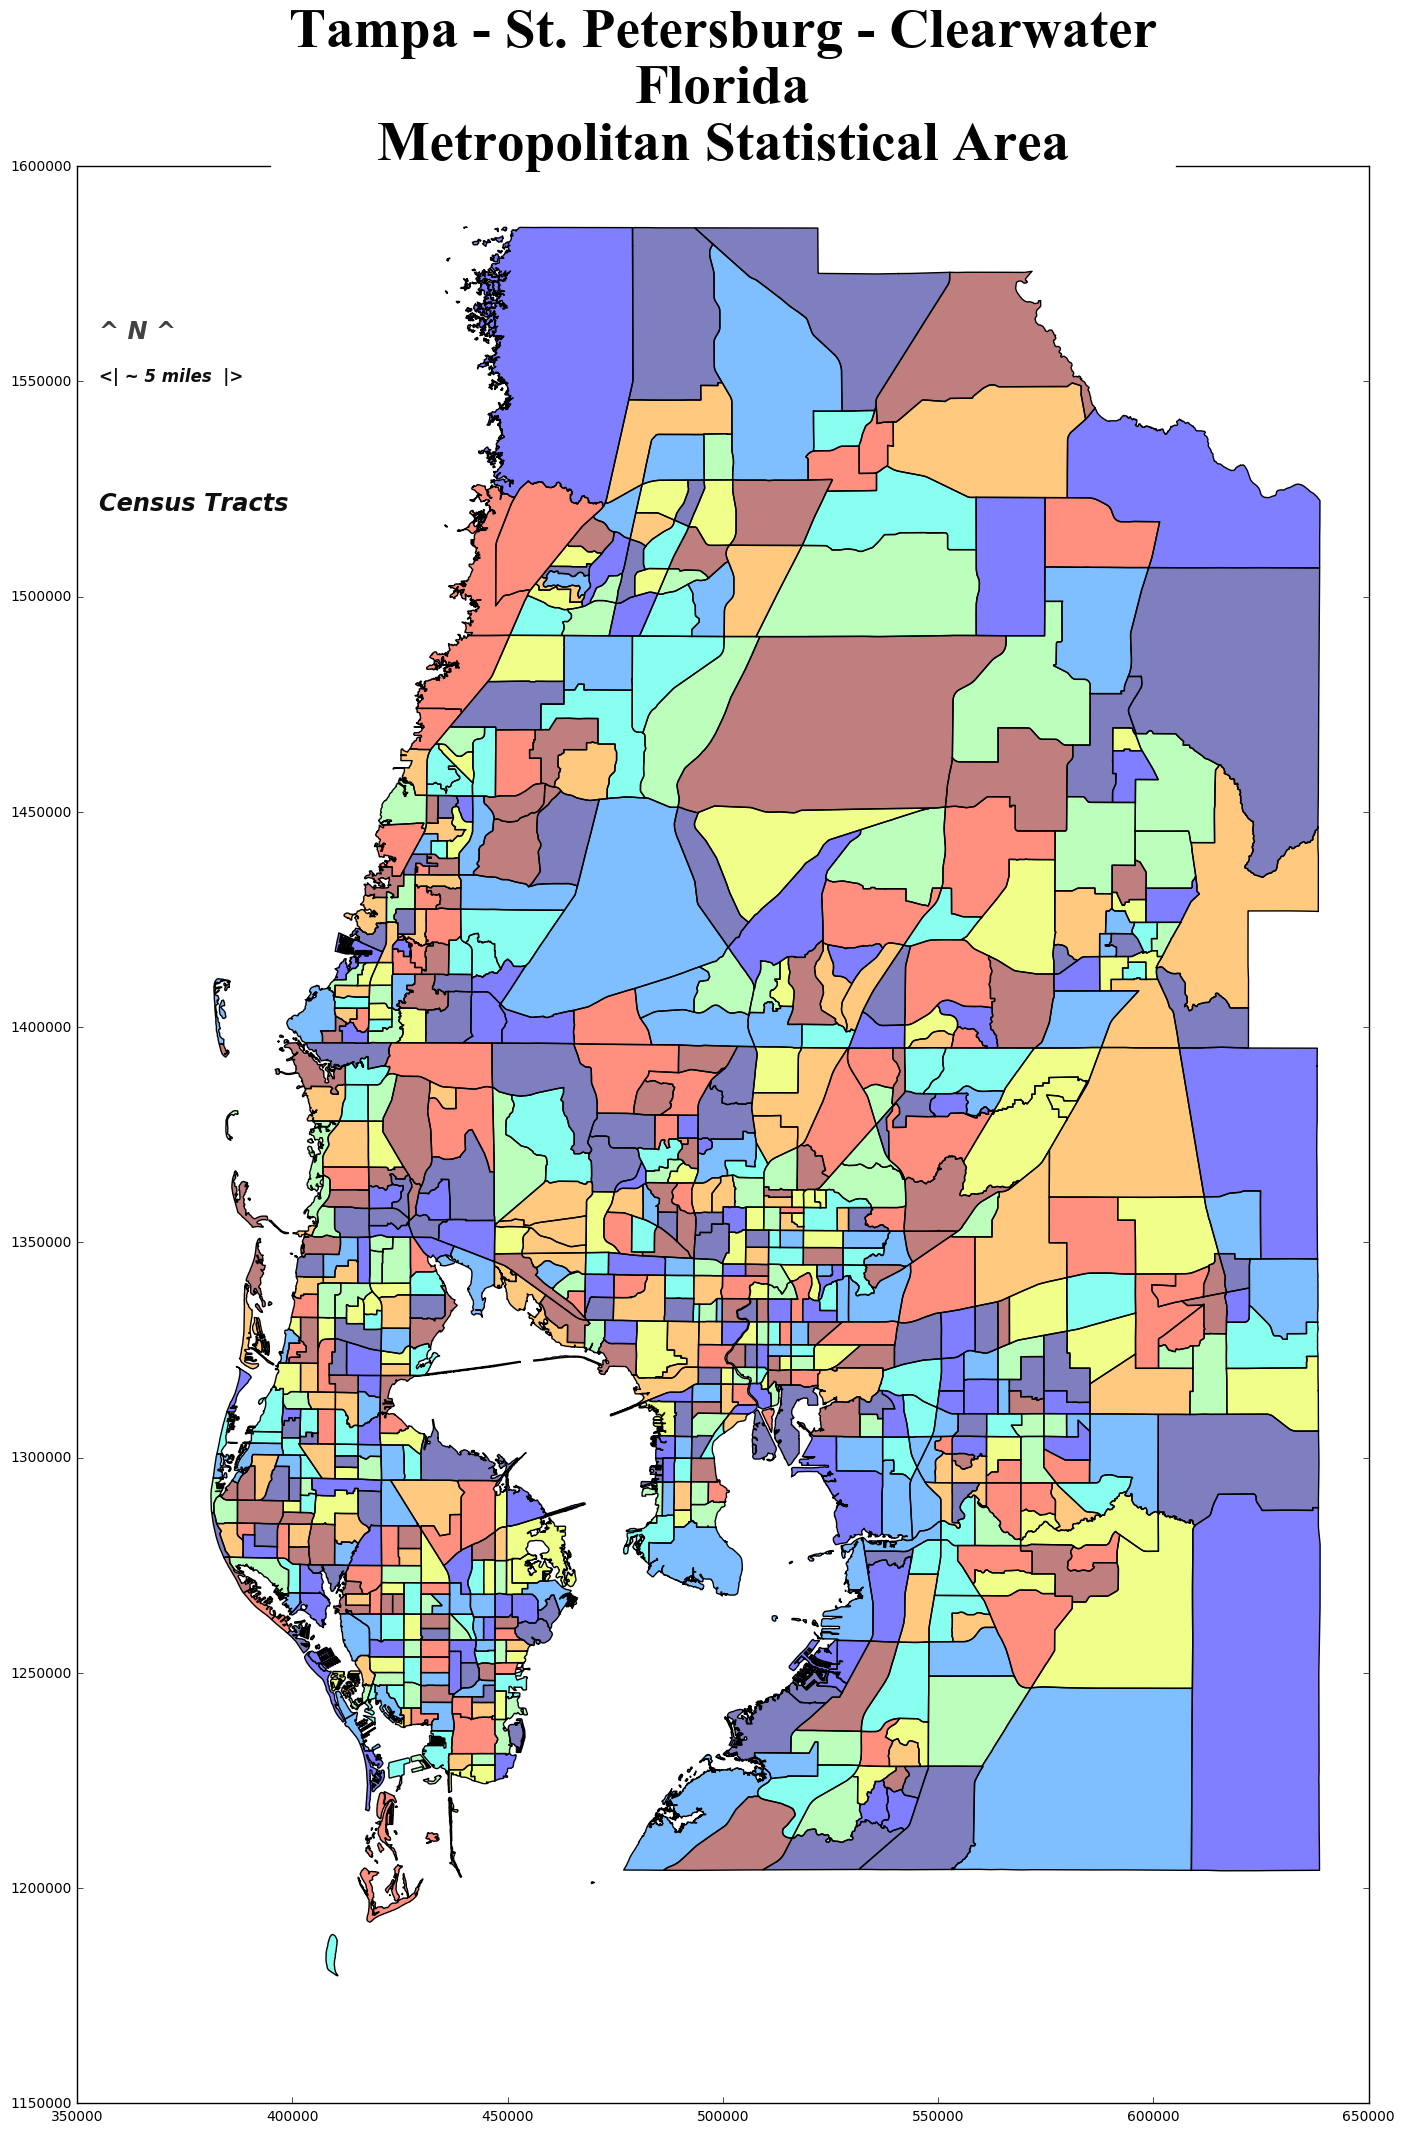

In [45]:
tampa_mas_tracts.plot()

# Title
plt.title('Tampa - St. Petersburg - Clearwater\nFlorida\nMetropolitan Statistical Area', 
          family='Times New Roman', 
          size=40, 
          color='k', 
          backgroundcolor='w', 
          weight='bold')

# Must be changed for different spatial resolutions, etc.
plt.annotate('^ N ^',
             xy=(355000, 1560000), 
             fontstyle='italic', 
             fontsize='xx-large',
             fontweight='heavy', 
             alpha=0.75)
plt.annotate('<| ~ 5 miles  |>', 
             xy=(355000, 1550000), 
             fontstyle='italic',
             fontweight='heavy',
             fontsize='large', 
             alpha=0.95)
plt.annotate("Census Tracts", 
             xy=(355000, 1520000), 
             fontstyle='italic',
             fontweight='heavy',
             fontsize='xx-large', 
             alpha=0.95)
plt.show()

### US Census Tract Demographic Data

In [19]:
us_tract_data = pd.read_csv(data_directory+tract_demographic)

### Join Tampa MSA and US Census Tract Data

In [20]:
tampa_msa_tract_Data = tampa_mas_tracts.merge(us_tract_data, on="GISJOIN")

### Census Tracts Calculate Stats

In [21]:
# Age Ratio (20-39)
tampa_msa_tract_Data["Age_Ratio"] = ((tampa_msa_tract_Data["ABAQE008"]    #Males
                                      + tampa_msa_tract_Data["ABAQE009"]
                                      + tampa_msa_tract_Data["ABAQE010"]
                                      + tampa_msa_tract_Data["ABAQE011"]
                                      + tampa_msa_tract_Data["ABAQE012"]
                                      + tampa_msa_tract_Data["ABAQE013"]
                                      + tampa_msa_tract_Data["ABAQE032"]  #Females
                                      + tampa_msa_tract_Data["ABAQE033"]
                                      + tampa_msa_tract_Data["ABAQE034"]
                                      + tampa_msa_tract_Data["ABAQE035"]
                                      + tampa_msa_tract_Data["ABAQE036"]
                                      + tampa_msa_tract_Data["ABAQE037"])
                                      / tampa_msa_tract_Data["ABAQE001"])

In [22]:
# Education Ratio (Bachelor's Degree)
tampa_msa_tract_Data["Ed_Ratio"] = (tampa_msa_tract_Data["ABC4E022"]
                                    / tampa_msa_tract_Data["ABC4E001"])

In [23]:
# Commute Time (Less than 25 minutes)
tampa_msa_tract_Data["Commute"] = ((tampa_msa_tract_Data["ABBTE002"]
                                    + tampa_msa_tract_Data["ABBTE003"]
                                    + tampa_msa_tract_Data["ABBTE004"]
                                    + tampa_msa_tract_Data["ABBTE005"]
                                    + tampa_msa_tract_Data["ABBTE006"])
                                    / tampa_msa_tract_Data["ABBTE001"])

### Quick Look at the Data

In [24]:
tampa_msa_tract_Data = tampa_msa_tract_Data.rename(columns = {"ABDPE001":"Median_HH_Income"})
tampa_msa_tract_Data[["Age_Ratio","Ed_Ratio","Commute","Median_HH_Income"]].head()

Age_Ratio  Ed_Ratio   Commute  Median_HH_Income
0   0.195912  0.124845  0.391649           46250.0
1   0.153059  0.053271  0.473034           34875.0
2   0.192268  0.076197  0.541996           42092.0
3   0.192253  0.090016  0.460057           34808.0
4   0.191619  0.067891  0.587033           41029.0

------------

# Tampa Twitter Data

In [25]:
only_tampa_MSA_tweets = gpd.read_file(data_directory+"tampa_msa_tweets_REPROJECTED.shp")
only_tampa_MSA_tweets = only_tampa_MSA_tweets.to_crs(epsg=2237)

------------

# Cleaned Data (Joined for Analyses)

### County Data

In [26]:
county_for_analysis = gpd.read_file(data_directory+"tampa_msa_counties_TWEETS_joined.shp")
county_for_analysis = county_for_analysis.to_crs(epsg=2237)
county_for_analysis = county_for_analysis.rename(columns = {"ABDPE001":"Median_HH_Income"})

### Tweets per 1000 - County

In [27]:
county_for_analysis["Tweets_1000"] = (county_for_analysis["PNTCNT"]\
                                     / (county_for_analysis["ABAQE001"] / 1000))

### Replace `inf` and Fill `NaN` Values

In [28]:
county_for_analysis = county_for_analysis.replace([np.inf, -np.inf], np.nan)
county_for_analysis = county_for_analysis.fillna(0.)
# Write Out
county_for_analysis.to_file(results_directory+"Tampa_MSA_county_for_analysis.shp")
county_for_analysis[["Age_Ratio","Ed_Ratio","Commute","PNTCNT","Tweets_1000"]]

Age_Ratio  Ed_Ratio  Commute  PNTCNT  Tweets_1000
0    0.19064   0.10845  0.54051      41     0.235914
1    0.21780   0.18585  0.61592     584     0.631331
2    0.21619   0.14269  0.45958     140     0.296143
3    0.28561   0.19225  0.52737     895     0.699400

### Chloropleth of Tweet Count with Tweet Overlay - County

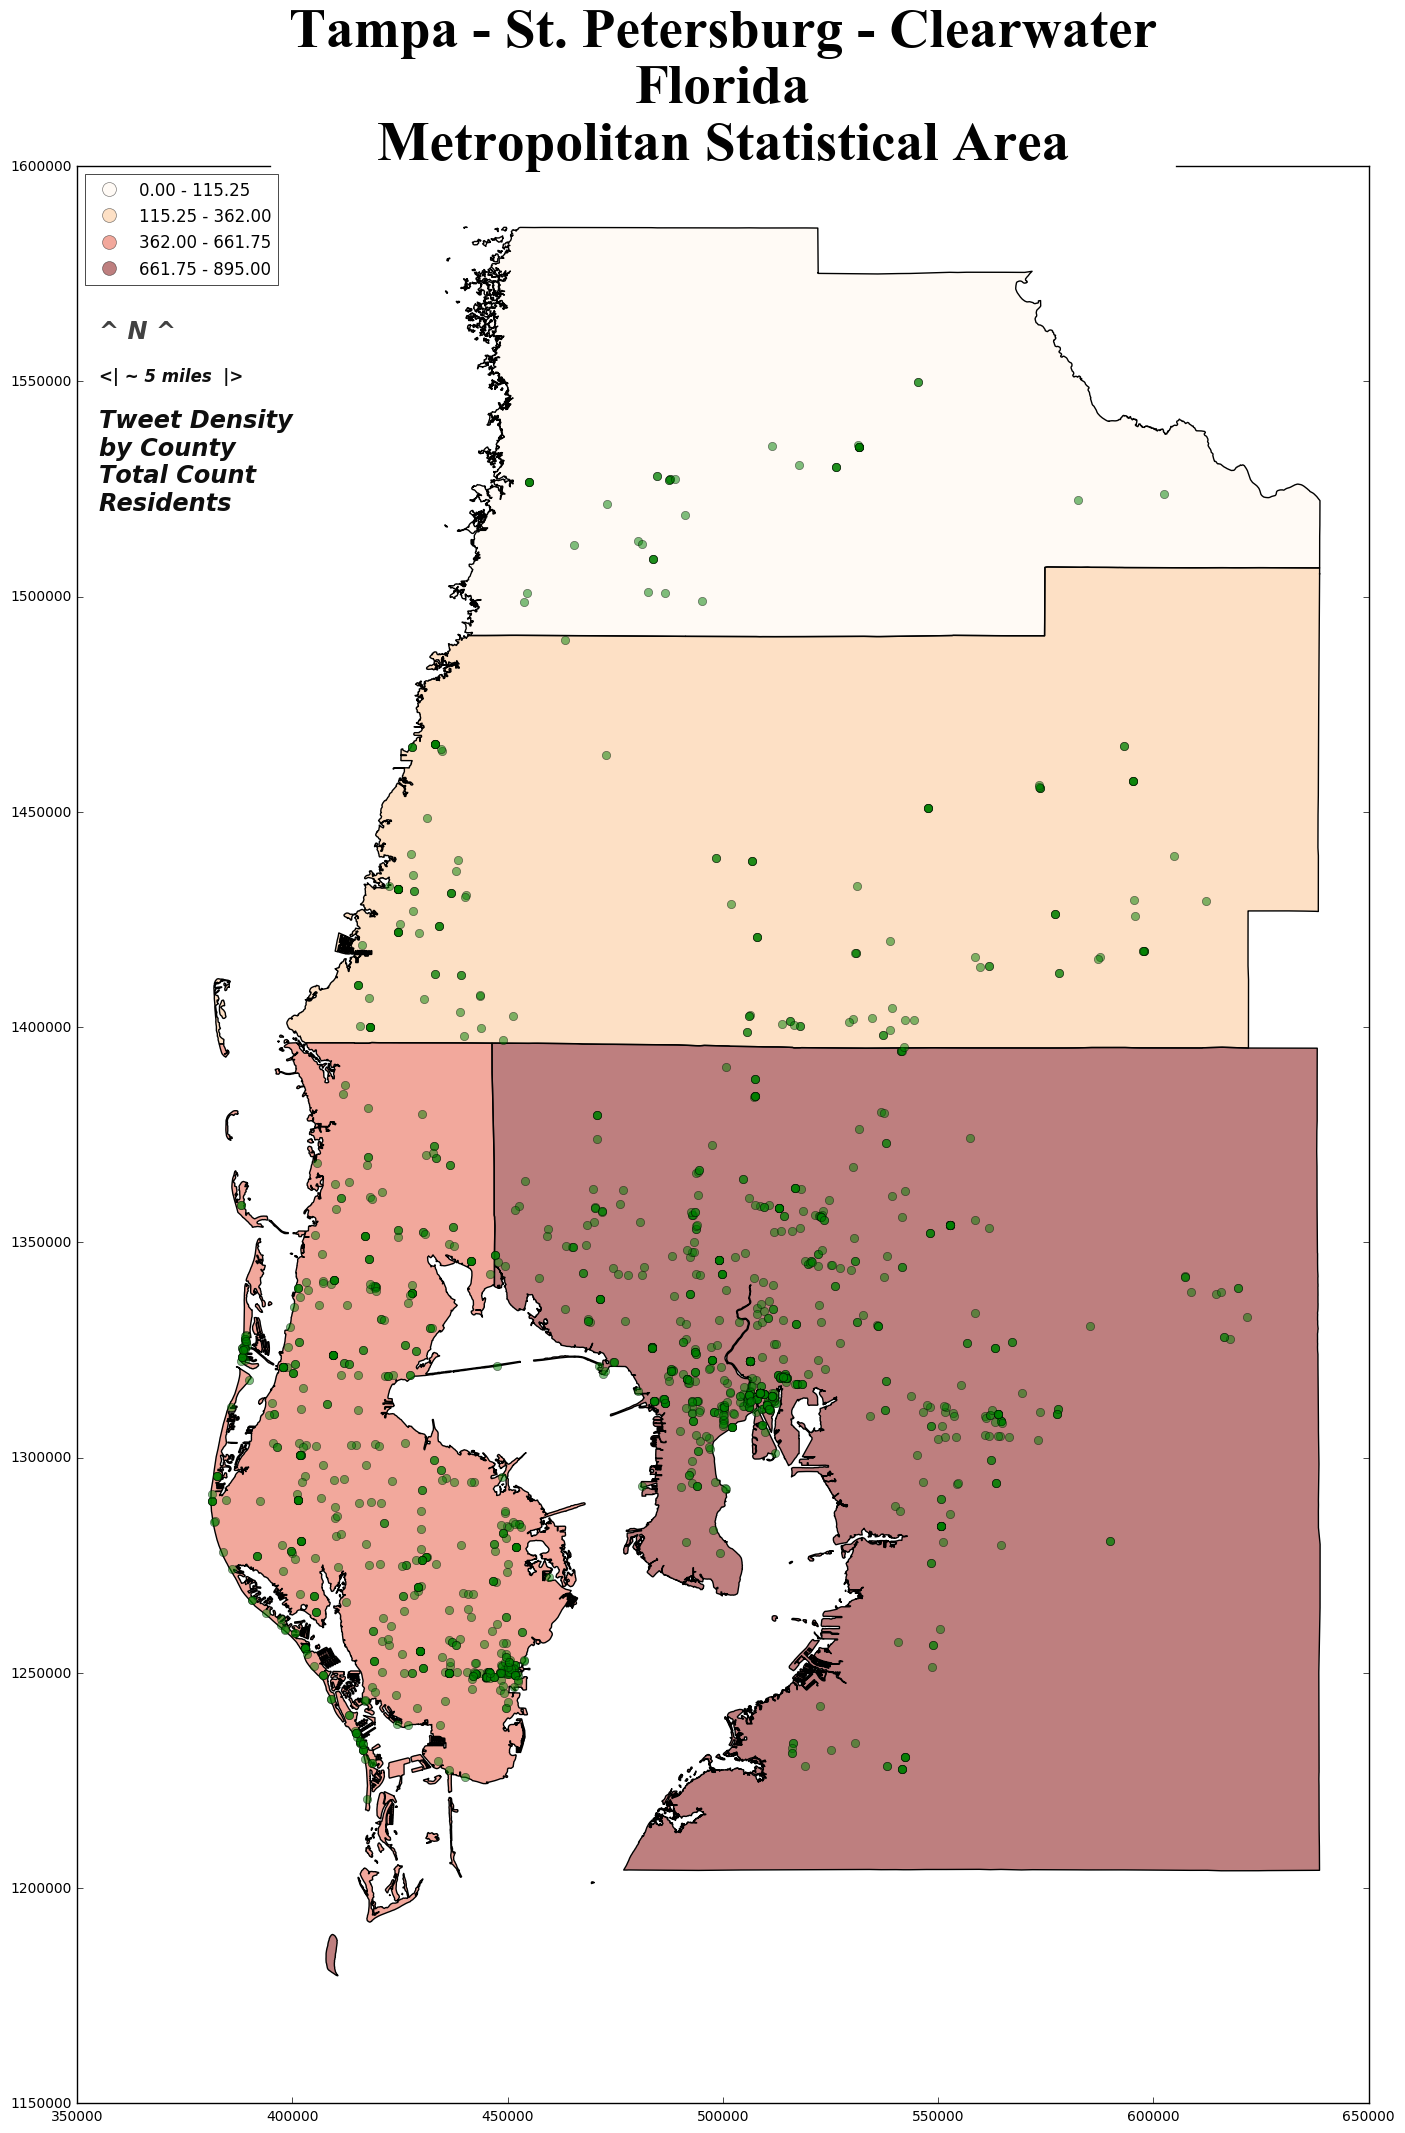

In [46]:
base = county_for_analysis.plot(column='PNTCNT', 
                                cmap='OrRd', 
                                scheme="quantiles", 
                                k=4,
                                legend=True)
only_tampa_MSA_tweets.plot(ax=base, 
                           marker='o', 
                           color='green', 
                           markersize=6, 
                           alpha=0.5)
# Title
plt.title('Tampa - St. Petersburg - Clearwater\nFlorida\nMetropolitan Statistical Area', 
          family='Times New Roman', 
          size=40, 
          color='k', 
          backgroundcolor='w', 
          weight='bold')

# Must be changed for different spatial resolutions, etc.
plt.annotate('^ N ^',
             xy=(355000, 1560000), 
             fontstyle='italic', 
             fontsize='xx-large',
             fontweight='heavy', 
             alpha=0.75)
plt.annotate('<| ~ 5 miles  |>', 
             xy=(355000, 1550000), 
             fontstyle='italic',
             fontweight='heavy',
             fontsize='large', 
             alpha=0.95)
plt.annotate("Tweet Density\nby County\nTotal Count\nResidents", 
             xy=(355000, 1520000), 
             fontstyle='italic',
             fontweight='heavy',
             fontsize='xx-large', 
             alpha=0.95)
plt.show()

### Chloropleth of Tweet Count per 1000 with Tweet Overlay - County

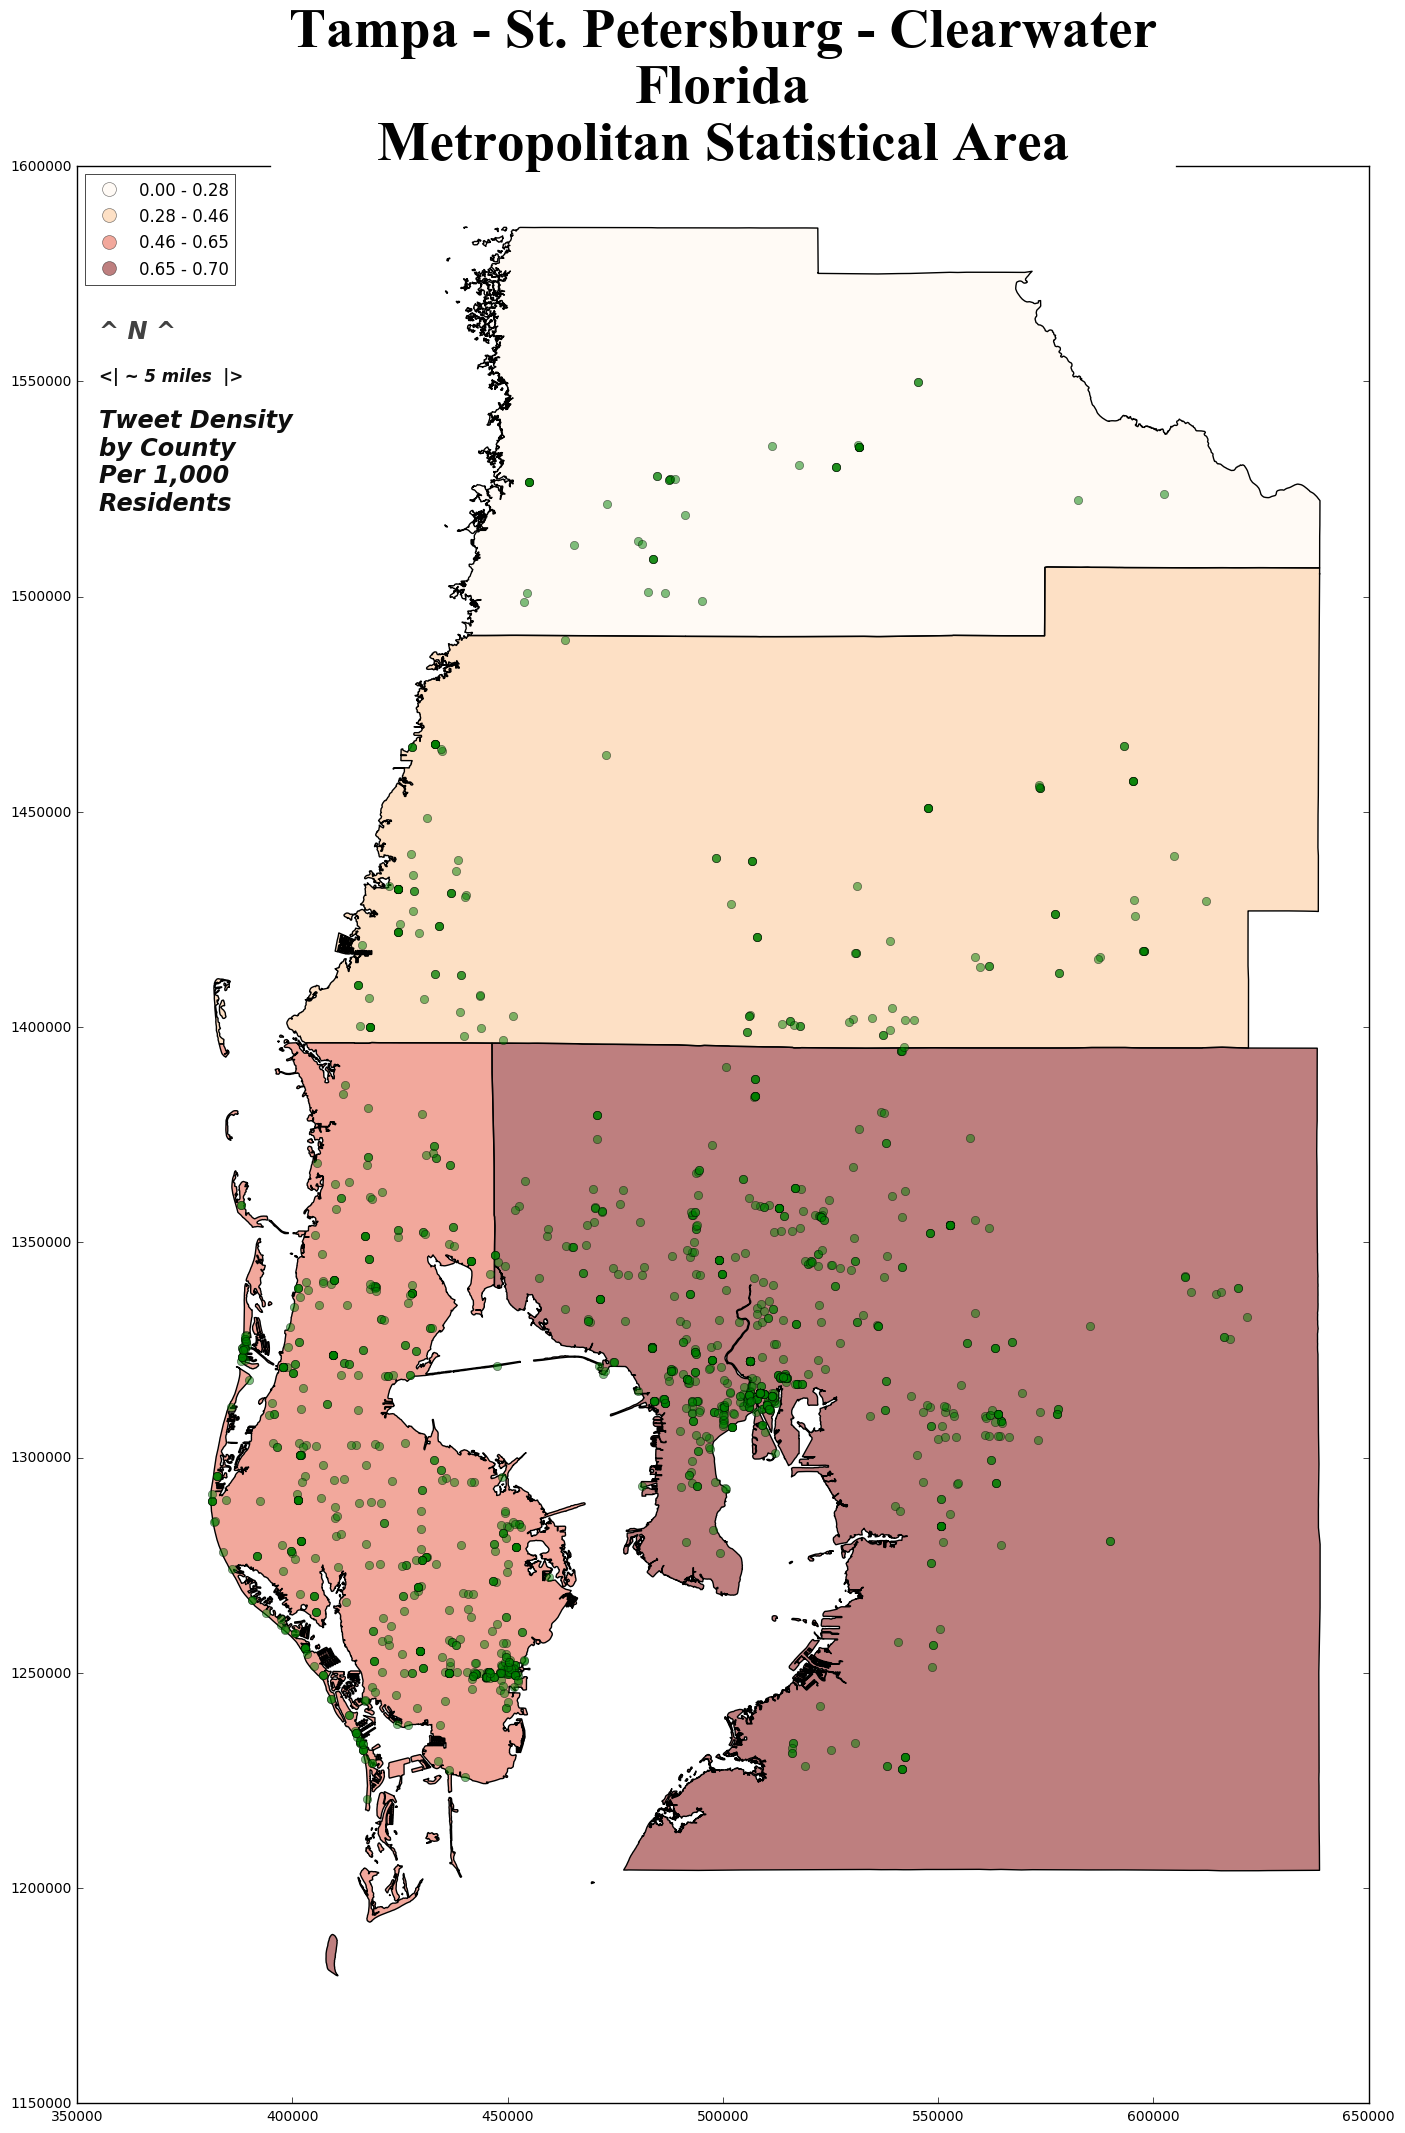

In [48]:
base = county_for_analysis.plot(column="Tweets_1000", 
                                cmap="OrRd", 
                                scheme="quantiles", 
                                k=4,
                                legend=True)
only_tampa_MSA_tweets.plot(ax=base, 
                           marker='o', 
                           color='green', 
                           markersize=6, 
                           alpha=0.5)
# Title
plt.title('Tampa - St. Petersburg - Clearwater\nFlorida\nMetropolitan Statistical Area', 
          family='Times New Roman', 
          size=40, 
          color='k', 
          backgroundcolor='w', 
          weight='bold')

# Must be changed for different spatial resolutions, etc.
plt.annotate('^ N ^',
             xy=(355000, 1560000), 
             fontstyle='italic', 
             fontsize='xx-large',
             fontweight='heavy', 
             alpha=0.75)
plt.annotate('<| ~ 5 miles  |>', 
             xy=(355000, 1550000), 
             fontstyle='italic',
             fontweight='heavy',
             fontsize='large', 
             alpha=0.95)
plt.annotate("Tweet Density\nby County\nPer 1,000\nResidents", 
             xy=(355000, 1520000), 
             fontstyle='italic',
             fontweight='heavy',
             fontsize='xx-large', 
             alpha=0.95)
plt.show()

### Census Tract Data

In [31]:
tract_for_analysis = gpd.read_file(data_directory+"tampa_msa_tracts_TWEETS_joined.shp")
tract_for_analysis = tract_for_analysis.to_crs(epsg=2237)
tract_for_analysis = tract_for_analysis.rename(columns = {"ABDPE001":"Median_HH_Income"})

### Tweets per 1000 - Census Tract

In [32]:
tract_for_analysis["Tweets_1000"] = (tract_for_analysis["PNTCNT"]\
                                     / (tract_for_analysis["ABAQE001"] / 1000))

### Replace `inf` and Fill `NaN` Values

In [33]:
tract_for_analysis = tract_for_analysis.replace([np.inf, -np.inf], np.nan)
tract_for_analysis = tract_for_analysis.fillna(0.)
# Write Out
tract_for_analysis.to_file(results_directory+"Tampa_MSA_tract_for_analysis.shp")
tract_for_analysis[["Age_Ratio","Ed_Ratio","Commute","PNTCNT","Tweets_1000"]].head()

Age_Ratio  Ed_Ratio  Commute  PNTCNT  Tweets_1000
0    0.20358   0.80749  0.38641     7.0     3.209537
1    0.27554   0.98718  0.45679     0.0     0.000000
2    0.20160   0.39259  0.41700     0.0     0.000000
3    0.20317   0.57732  0.55891     3.0     1.285898
4    0.25697   0.20397  0.54074     1.0     0.293341

### Chloropleth of Tweet Count with Tweet Overlay - Census Tract

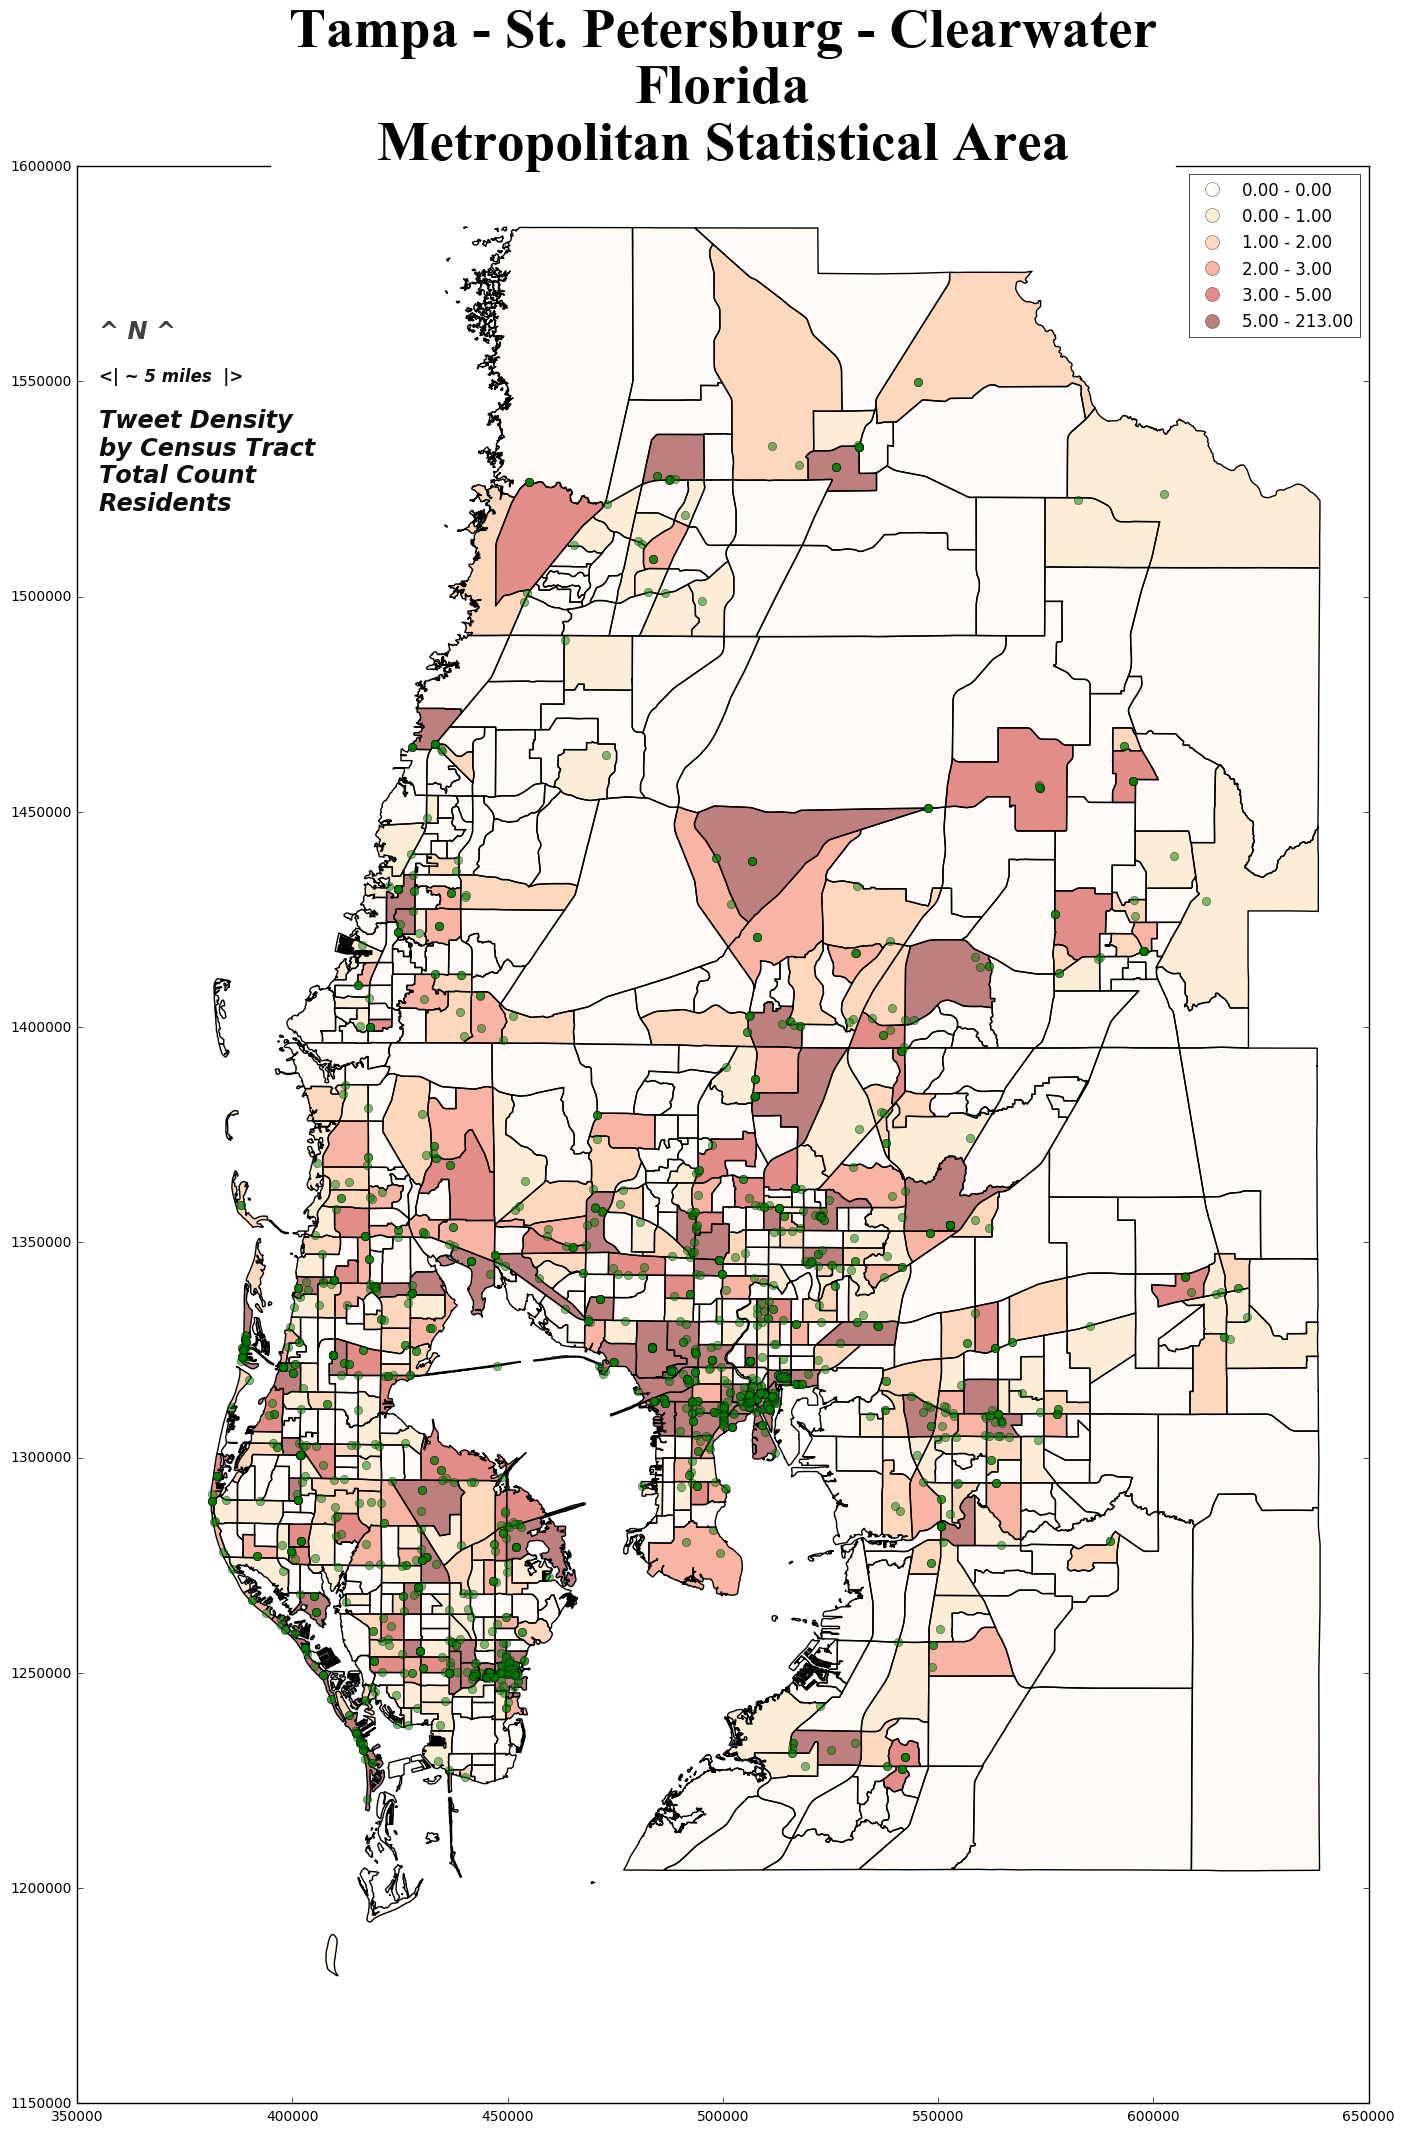

In [49]:
base = tract_for_analysis.plot(column="PNTCNT", 
                                cmap="OrRd", 
                                scheme="quantiles", 
                                k=9,
                                legend=True)
only_tampa_MSA_tweets.plot(ax=base, 
                           marker='o', 
                           color='green', 
                           markersize=6, 
                           alpha=0.5)
# Title
plt.title('Tampa - St. Petersburg - Clearwater\nFlorida\nMetropolitan Statistical Area', 
          family='Times New Roman', 
          size=40, 
          color='k', 
          backgroundcolor='w', 
          weight='bold')

# Must be changed for different spatial resolutions, etc.
plt.annotate('^ N ^',
             xy=(355000, 1560000), 
             fontstyle='italic', 
             fontsize='xx-large',
             fontweight='heavy', 
             alpha=0.75)
plt.annotate('<| ~ 5 miles  |>', 
             xy=(355000, 1550000), 
             fontstyle='italic',
             fontweight='heavy',
             fontsize='large', 
             alpha=0.95)
plt.annotate("Tweet Density\nby Census Tract\nTotal Count\nResidents", 
             xy=(355000, 1520000), 
             fontstyle='italic',
             fontweight='heavy',
             fontsize='xx-large', 
             alpha=0.95)
plt.show()

### Chloropleth of Tweet Count per 1000 with Tweet Overlay - Census Tract

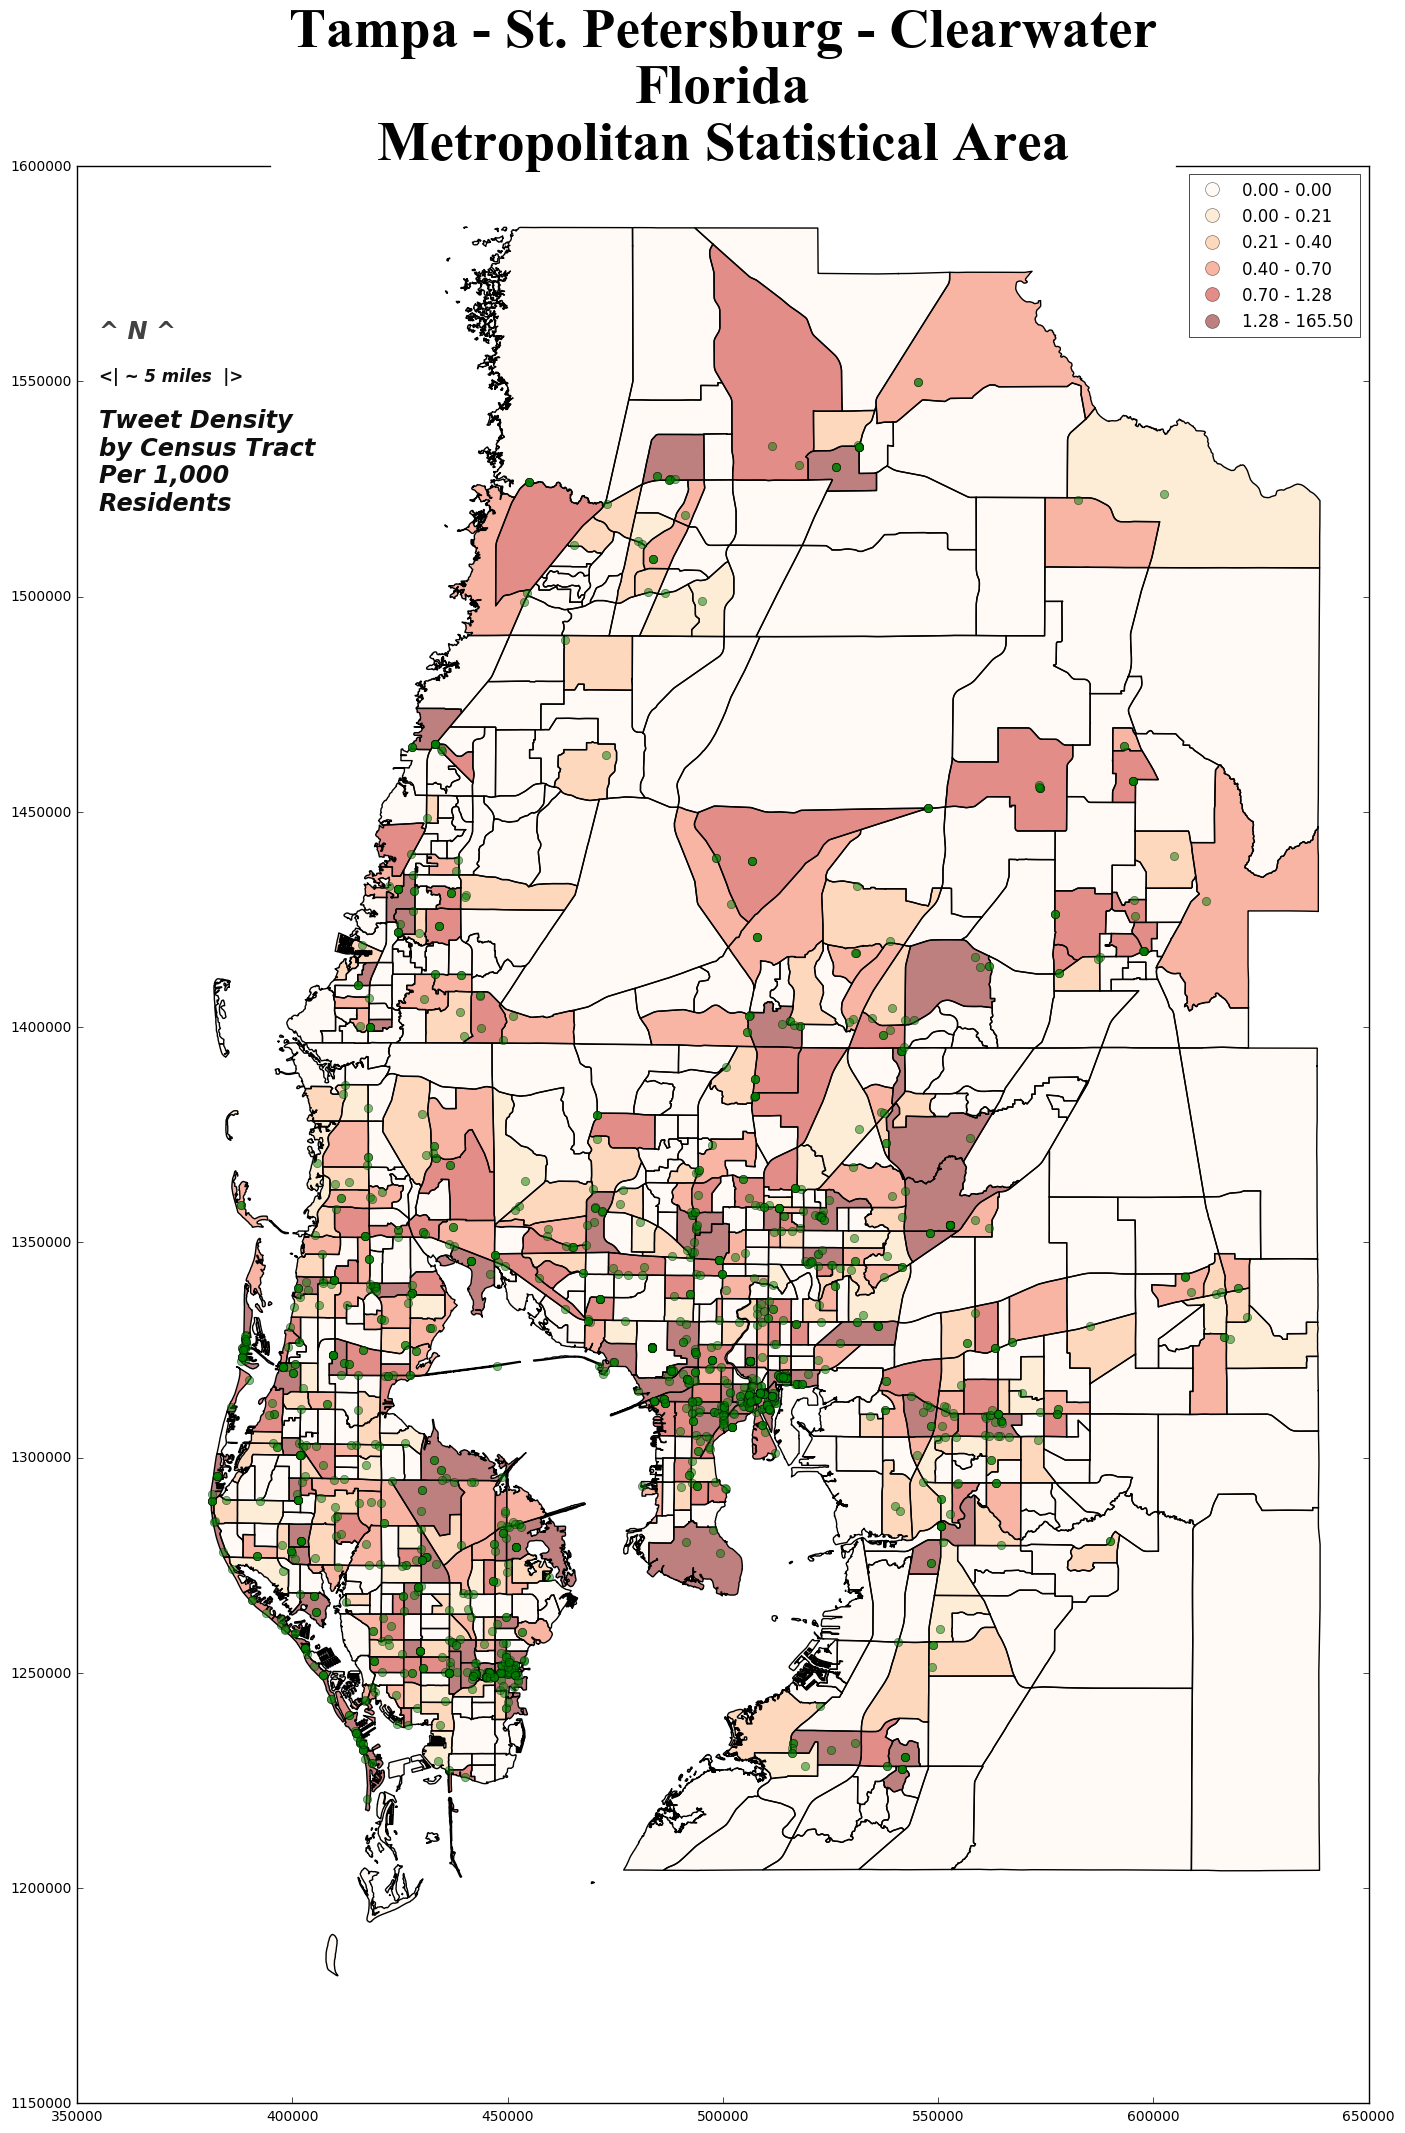

In [50]:
base = tract_for_analysis.plot(column="Tweets_1000", 
                                cmap="OrRd", 
                                scheme="quantiles", 
                                k=9,
                                legend=True)
only_tampa_MSA_tweets.plot(ax=base, 
                           marker='o', 
                           color='green', 
                           markersize=6, 
                           alpha=0.5)
# Title
plt.title('Tampa - St. Petersburg - Clearwater\nFlorida\nMetropolitan Statistical Area', 
          family='Times New Roman', 
          size=40, 
          color='k', 
          backgroundcolor='w', 
          weight='bold')

# Must be changed for different spatial resolutions, etc.
plt.annotate('^ N ^',
             xy=(355000, 1560000), 
             fontstyle='italic', 
             fontsize='xx-large',
             fontweight='heavy', 
             alpha=0.75)
plt.annotate('<| ~ 5 miles  |>', 
             xy=(355000, 1550000), 
             fontstyle='italic',
             fontweight='heavy',
             fontsize='large', 
             alpha=0.95)
plt.annotate("Tweet Density\nby Census Tract\nPer 1,000\nResidents", 
             xy=(355000, 1520000), 
             fontstyle='italic',
             fontweight='heavy',
             fontsize='xx-large', 
             alpha=0.95)
plt.show()

### Correlations

In [36]:
corr_vars = ["PNTCNT","Tweets_1000","Median_HH_Income","Age_Ratio","Ed_Ratio","Commute"]

### Tract Corrrelation Matrix

In [37]:
# Calculate Correlations
tract_corr = []
idx = -1
for var_1 in tract_for_analysis[corr_vars]:
    idx += 1
    tract_corr.append([])
    for var_2 in corr_vars:
        tract_corr[idx].append(np.corrcoef(tract_for_analysis[corr_vars][var_1],
                                            tract_for_analysis[corr_vars][var_2])[0][1])
# Correlation Matrix
tract_corr = pd.DataFrame(np.array(tract_corr), 
                          columns=corr_vars, 
                          index=corr_vars)
# Write Out
tract_corr.to_csv(results_directory+"Tampa_tract_correlation_matrix.csv")
tract_corr

PNTCNT  Tweets_1000  Median_HH_Income  Age_Ratio  \
PNTCNT            1.000000     0.963207         -0.021829   0.158749   
Tweets_1000       0.963207     1.000000         -0.023613   0.142424   
Median_HH_Income -0.021829    -0.023613          1.000000  -0.074083   
Age_Ratio         0.158749     0.142424         -0.074083   1.000000   
Ed_Ratio          0.075861     0.054833          0.560282  -0.122541   
Commute           0.081120     0.023686         -0.246359   0.178630   

                  Ed_Ratio   Commute  
PNTCNT            0.075861  0.081120  
Tweets_1000       0.054833  0.023686  
Median_HH_Income  0.560282 -0.246359  
Age_Ratio        -0.122541  0.178630  
Ed_Ratio          1.000000 -0.180986  
Commute          -0.180986  1.000000

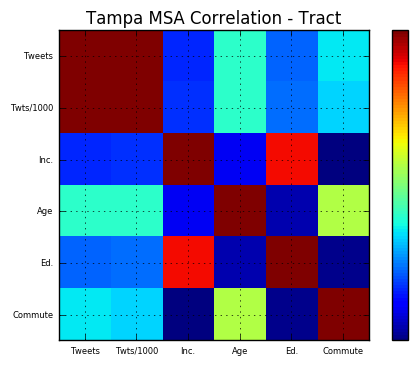

In [38]:
correlation_matrix(tract_corr, title="Tampa MSA Correlation - Tract")

### County Corrrelation Matrix

In [39]:
county_corr = []
idx = -1
for var_1 in county_for_analysis[corr_vars]:
    idx += 1
    county_corr.append([])
    for var_2 in corr_vars:
        county_corr[idx].append(np.corrcoef(county_for_analysis[corr_vars][var_1],
                                            county_for_analysis[corr_vars][var_2])[0][1])
county_corr = pd.DataFrame(np.array(county_corr), 
                           columns=corr_vars, 
                           index=corr_vars)
# Write Out
county_corr.to_csv(results_directory+"Tampa_county_correlation_matrix.csv")
county_corr

PNTCNT  Tweets_1000  Median_HH_Income  Age_Ratio  \
PNTCNT            1.000000     0.978924          0.925871   0.889705   
Tweets_1000       0.978924     1.000000          0.868919   0.785193   
Median_HH_Income  0.925871     0.868919          1.000000   0.959911   
Age_Ratio         0.889705     0.785193          0.959911   1.000000   
Ed_Ratio          0.935754     0.965786          0.905965   0.775905   
Commute           0.375261     0.515421          0.023730  -0.074031   

                  Ed_Ratio   Commute  
PNTCNT            0.935754  0.375261  
Tweets_1000       0.965786  0.515421  
Median_HH_Income  0.905965  0.023730  
Age_Ratio         0.775905 -0.074031  
Ed_Ratio          1.000000  0.380542  
Commute           0.380542  1.000000

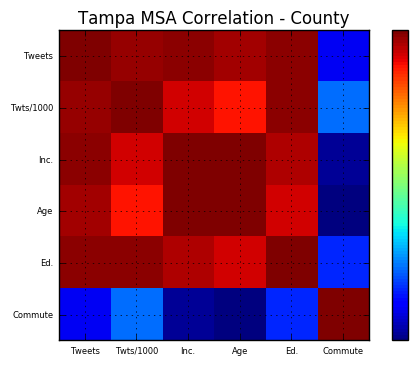

In [40]:
correlation_matrix(county_corr, title="Tampa MSA Correlation - County")

----------------

----------------

----------------

# U.S. Counties

In [6]:
us_county_analysis = gpd.read_file(data_directory+prepped_county)
us_county_analysis = us_county_analysis.rename(columns = {"ABDPE001":"Median_HH_Income"})

# U.S. Twitter Data

In [7]:
US_tweets = gpd.read_file(data_directory+"US_Tweets.shp")

In [8]:
# Age Ratio (20-39)
us_county_analysis["Age_Ratio"] = ((us_county_analysis["ABAQE008"]    #Males
                                      + us_county_analysis["ABAQE009"]
                                      + us_county_analysis["ABAQE010"]
                                      + us_county_analysis["ABAQE011"]
                                      + us_county_analysis["ABAQE012"]
                                      + us_county_analysis["ABAQE013"]
                                      + us_county_analysis["ABAQE032"]  #Females
                                      + us_county_analysis["ABAQE033"]
                                      + us_county_analysis["ABAQE034"]
                                      + us_county_analysis["ABAQE035"]
                                      + us_county_analysis["ABAQE036"]
                                      + us_county_analysis["ABAQE037"])
                                      / us_county_analysis["ABAQE001"])
# Education Ratio (Bachelor's Degree)
us_county_analysis["Ed_Ratio"] = (us_county_analysis["ABC4E022"]
                                    / us_county_analysis["ABC4E001"])
# Commute Time (Less than 25 minutes)
us_county_analysis["Commute"] = ((us_county_analysis["ABBTE002"]
                                    + us_county_analysis["ABBTE003"]
                                    + us_county_analysis["ABBTE004"]
                                    + us_county_analysis["ABBTE005"]
                                    + us_county_analysis["ABBTE006"])
                                    / us_county_analysis["ABBTE001"])
# Tweets per 1000 Residents
us_county_analysis["Tweets_1000"] = (us_county_analysis["PNTCNT"]\
                                     / (us_county_analysis["ABAQE001"] / 1000))

In [9]:
us_county_analysis = us_county_analysis.replace([np.inf, -np.inf], np.nan)
us_county_analysis = us_county_analysis.fillna(0.)
# Write Out
us_county_analysis.to_file(results_directory+"US_county_for_analysis.shp")
us_county_analysis[["Age_Ratio","Ed_Ratio","Commute","PNTCNT","Tweets_1000"]].head()

Age_Ratio  Ed_Ratio   Commute  PNTCNT  Tweets_1000
0   0.180266  0.136772  0.815156     0.0     0.000000
1   0.169821  0.101506  0.534188     0.0     0.000000
2   0.173869  0.073136  0.849758     0.0     0.000000
3   0.322191  0.238169  0.791033   180.0     0.612816
4   0.183029  0.111720  0.765087     0.0     0.000000

### Chloropleth of Tweet Count - U.S. Counties

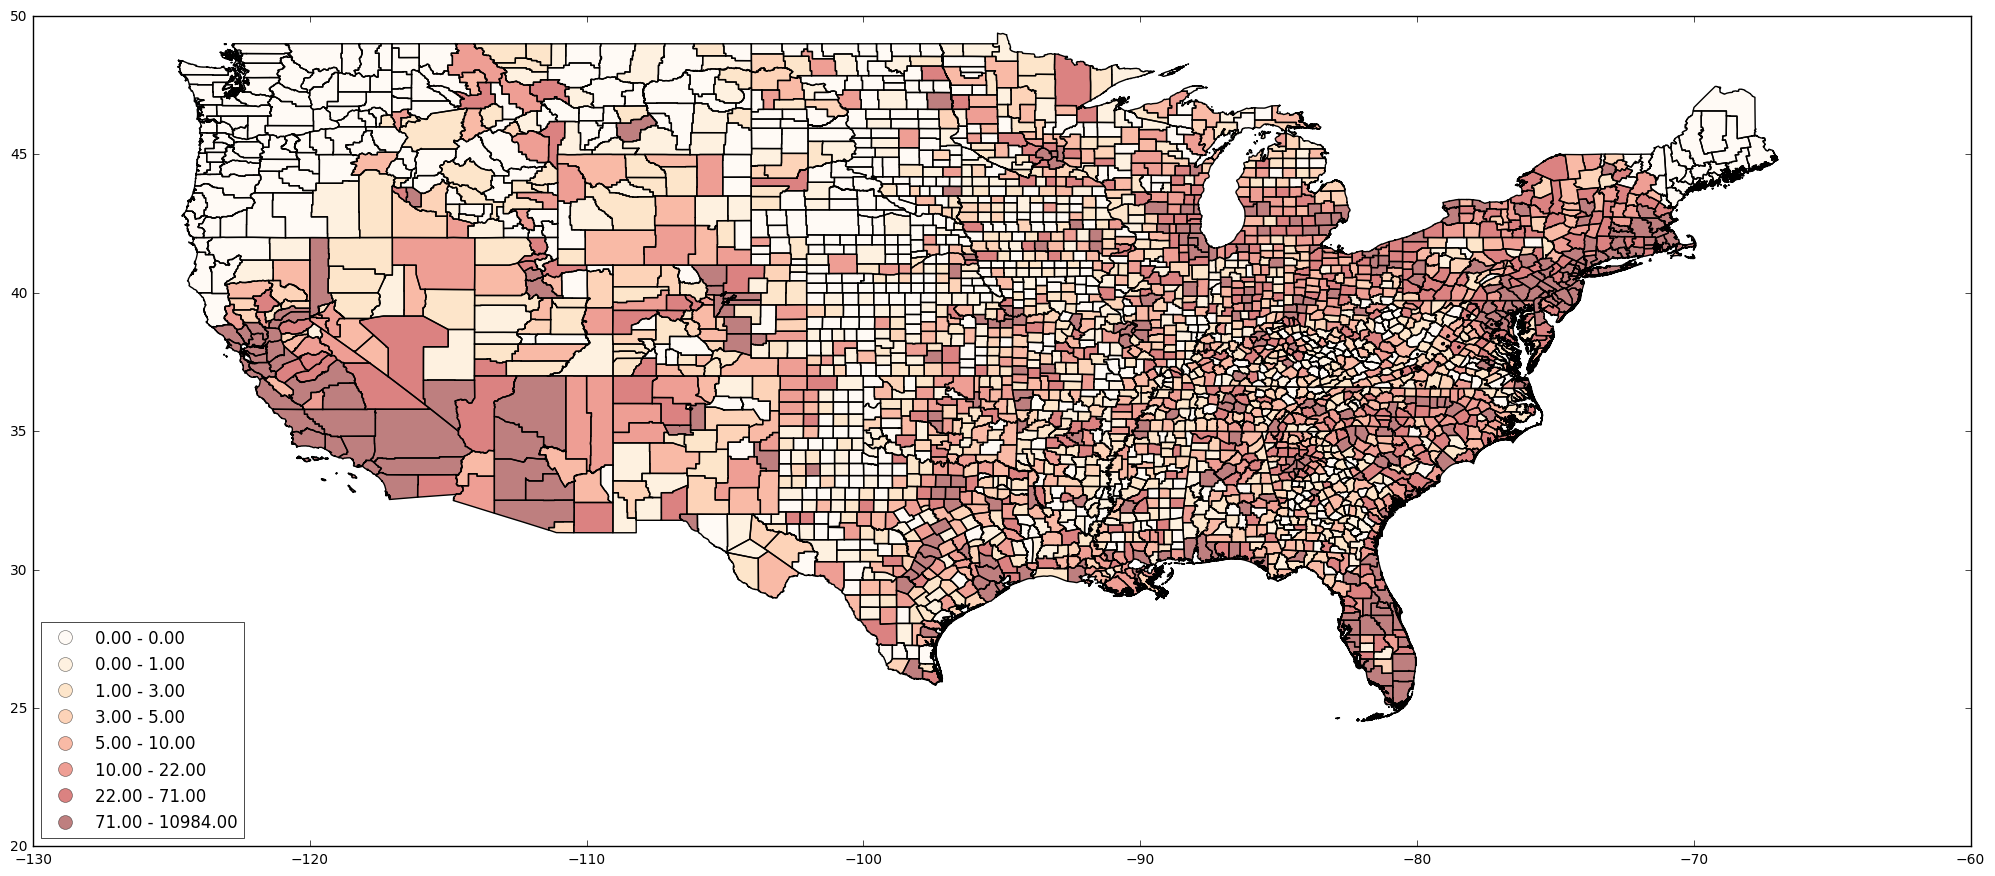

In [7]:
us_county_analysis.plot(column="PNTCNT", 
                                cmap="OrRd", 
                                scheme="quantiles", 
                                k=9,
                                legend=True)

### Chloropleth of Tweet Count per 1000 - U.S. Counties

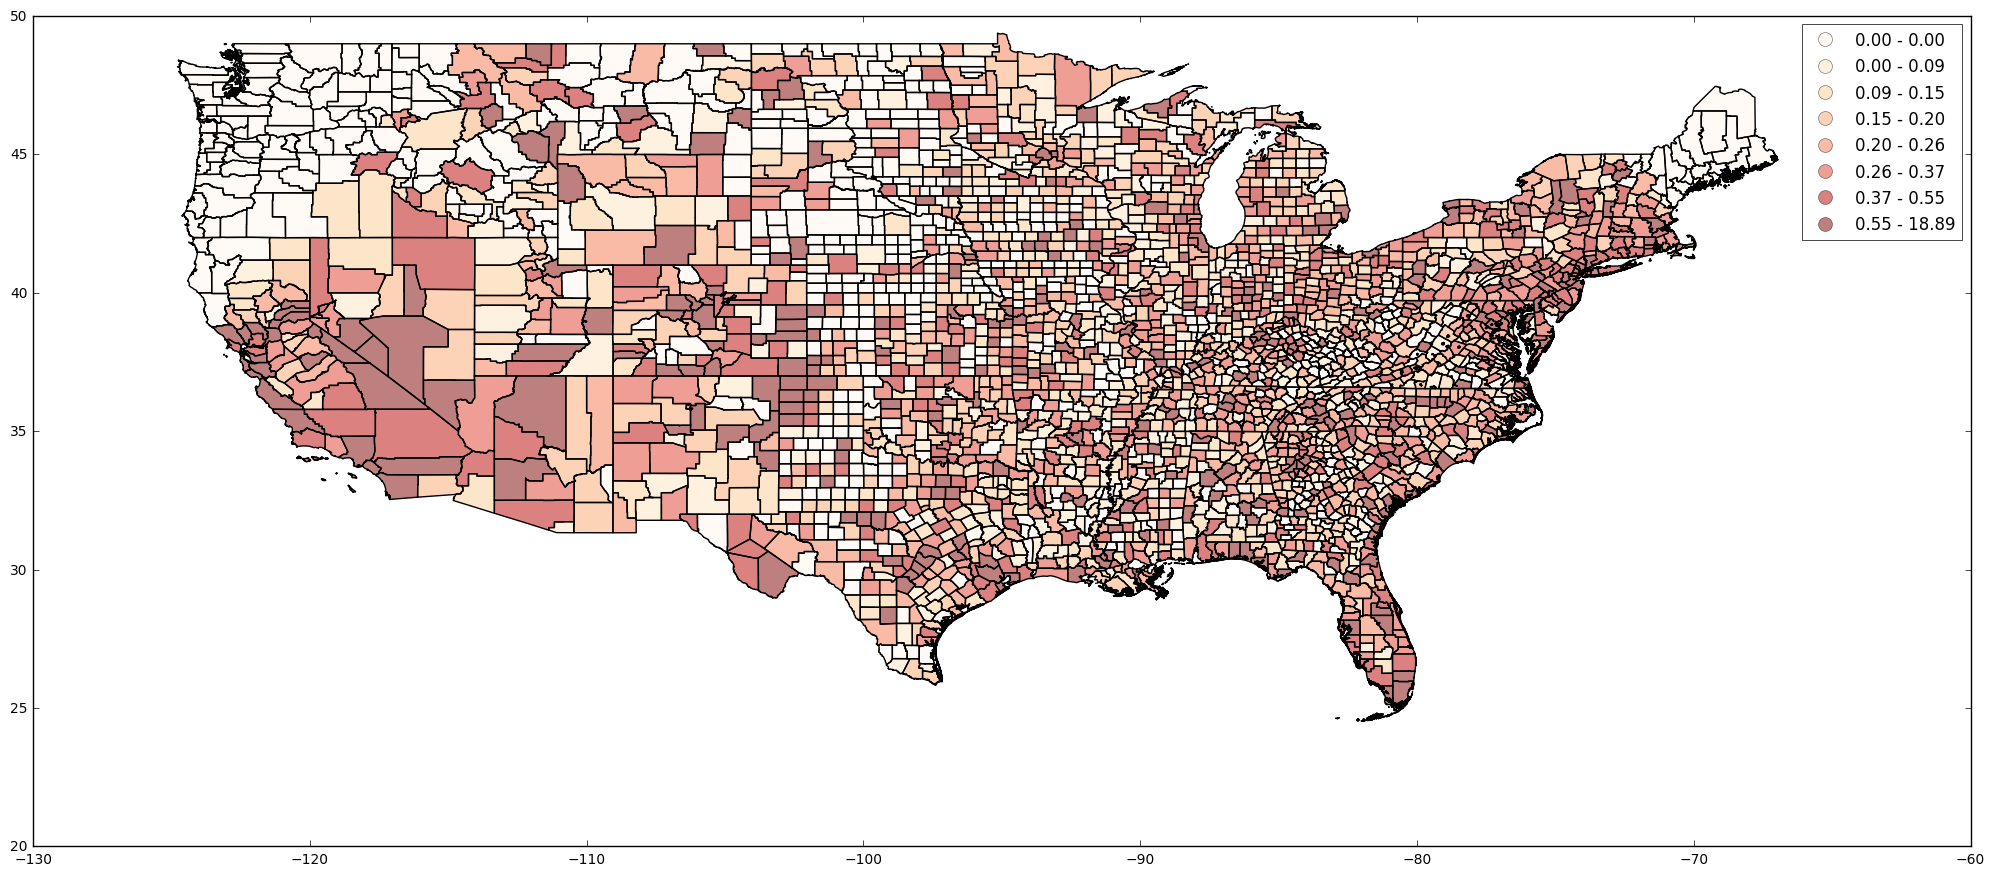

In [9]:
us_county_analysis.plot(column="Tweets_100", 
                                cmap="OrRd", 
                                scheme="quantiles", 
                                k=9,
                                legend=True)

### U.S. County Corrrelation Matrix

In [13]:
# Calculate Correlations
US_corr = []
idx = -1
for var_1 in us_county_analysis[corr_vars]:
    idx += 1
    US_corr.append([])
    for var_2 in corr_vars:
        US_corr[idx].append(np.corrcoef(us_county_analysis[corr_vars][var_1],
                                            us_county_analysis[corr_vars][var_2])[0][1])
# Correlation Matrix
US_corr = pd.DataFrame(np.array(US_corr), 
                          columns=corr_vars, 
                          index=corr_vars)
# Write Out
US_corr.to_csv(results_directory+"US_county_correlation_matrix.csv")
US_corr

PNTCNT  Tweets_1000  Median_HH_Income  Age_Ratio  \
PNTCNT            1.000000     0.210388          0.164159   0.212245   
Tweets_1000       0.210388     1.000000          0.114202   0.169887   
Median_HH_Income  0.164159     0.114202          1.000000   0.076687   
Age_Ratio         0.212245     0.169887          0.076687   1.000000   
Ed_Ratio          0.237725     0.190528          0.704016   0.210585   
Commute          -0.125382     0.018730         -0.198615   0.072649   

                  Ed_Ratio   Commute  
PNTCNT            0.237725 -0.125382  
Tweets_1000       0.190528  0.018730  
Median_HH_Income  0.704016 -0.198615  
Age_Ratio         0.210585  0.072649  
Ed_Ratio          1.000000  0.097937  
Commute           0.097937  1.000000

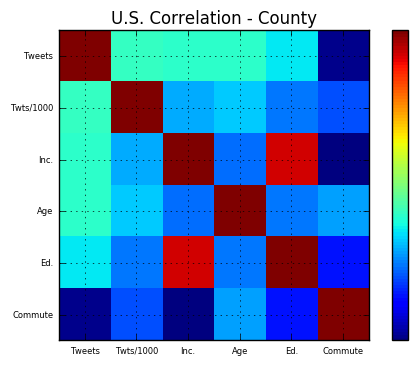

In [14]:
correlation_matrix(US_corr, title="U.S. Correlation - County")

--------------------